# Iterative Construction of a Penalised Vine Structure
This notebook iteratively estimate the quantile.

#### Libraries

In [1]:
import openturns as ot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

random_state = 123
np.random.seed(random_state)

#### Model function
This example consider the simple additive example.

In [2]:
from depimpact.tests import func_overflow, margins_overflow, var_names_overflow, func_sum

test_func = func_overflow

#### Dimension and margins
We first define the problem dimension and the margins

In [3]:
margins = margins_overflow
dim = len(margins)

families = np.zeros((dim, dim), dtype=int)
for i in range(1, dim):
    for j in range(i):
        families[i, j] = 1

In [5]:
from depimpact import ConservativeEstimate
ot.RandomGenerator.SetSeed(0)
np.random.seed(0)
K = 100
q_estimate = ConservativeEstimate(test_func, margins, families)

We chose the coefficients of the variables throught the additive function.

In [6]:

from dependence import iterative_vine_minimize
algorithm_parameters = {
    "n_input_sample": 10000,
    "n_dep_param_init": 10,
    "max_n_pairs": 1,
    "grid_type": 'lhs',
    "q_func": q_func,
    "n_add_pairs": 1,
    "n_remove_pairs": 0,
    "adapt_vine_structure": True,
    "with_bootstrap": False,
    "verbose": True,
    "iterative_save": False,
    "iterative_load": False,
    "load_input_samples": False,
    "keep_input_samples": False
}

quant_estimate = ConservativeEstimate(model_func=test_func, margins=margins, families=families)


iterative_results = iterative_vine_minimize(estimate_object=quant_estimate, **algorithm_parameters)

NameError: name 'q_func' is not defined

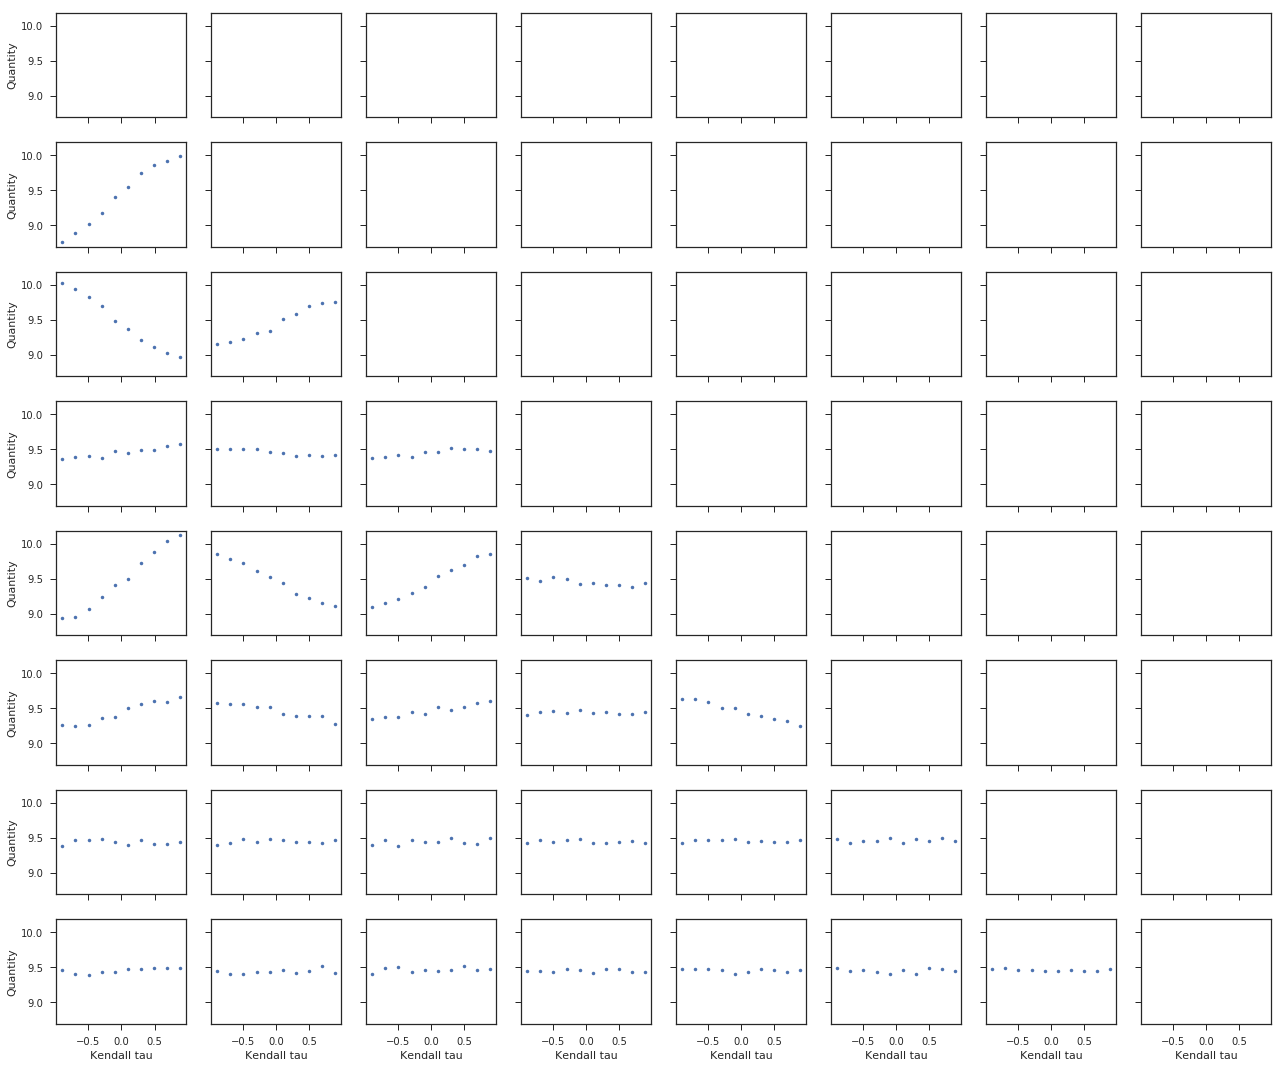

In [34]:
from depimpact.dependence_plot import matrix_plot_quantities
matrix_plot_quantities(iterative_results[0], figsize=(18, 15))
# plt.savefig('output/matrix_plot.png')

## Estimations
We create an instance of the main class for conservative estimate, and we define a q_func object for the quantile as a quantity of interest

In [4]:
from depimpact import ConservativeEstimate, quantile_func

alpha = 0.95

if alpha > 0.5: # Maximizing the quantile
    def q_func(x, axis=1):
        return - quantile_func(alpha)(x, axis=axis)
else: # Minimizing
    q_func = quantile_func(alpha)

In [49]:
from depimpact.utils import get_grid_sample, to_copula_params
from depimpact.dependence_plot import plot_variation, compute_influence
K = 12
n = int(1E6)
pair = [1, 0]

copulas = {'Normal': [1, 1],
           'Clayton': [13, 33],
           'Gumbel': [4, 24],
           'Joe': [6, 26]}

families = np.zeros((dim, dim))
quant_estimate = ConservativeEstimate(model_func=test_func, margins=margins, families=families)
kendalls, output_samples = compute_influence(quant_estimate, K, n, copulas, pair=pair)

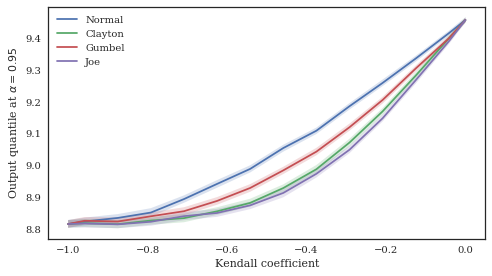

In [50]:
ylabel = 'Output quantile at $\\alpha=%.2f$' % (alpha)
plot_area = 'left'

plt_lib = 'seaborn'
plot_variation(output_samples, kendalls, q_func, plot_area, ylabel=ylabel, plt_lib=plt_lib)
plt.savefig('./output/flood_example_variation_quantile_%s_K%d_n_%d_%s.pdf' % (plt_lib, 
                                                                              K, n, plot_area))

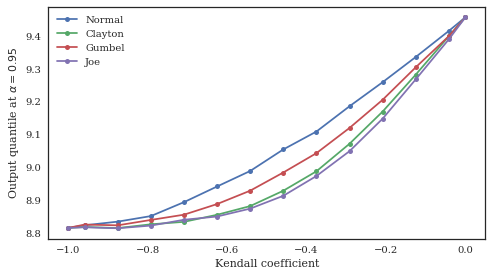

In [51]:
plt_lib = 'matplotlib'
plot_variation(output_samples, kendalls, q_func, plot_area, ylabel=ylabel, plt_lib=plt_lib)
plt.savefig('./output/flood_example_variation_quantile_%s_K%d_n_%d_%s.pdf' % (plt_lib, 
                                                                              K, n, plot_area))

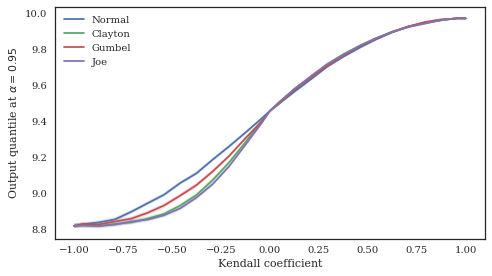

In [52]:
plot_area = 'full'

plt_lib = 'seaborn'
plot_variation(output_samples, kendalls, q_func, plot_area, ylabel=ylabel, plt_lib=plt_lib)
plt.savefig('./output/flood_example_variation_quantile_%s_K%d_n_%d_%s.pdf' % (plt_lib, 
                                                                              K, n, plot_area))

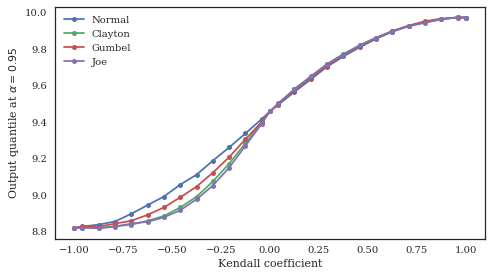

In [53]:
plt_lib = 'matplotlib'
plot_variation(output_samples, kendalls, q_func, plot_area, ylabel=ylabel, plt_lib=plt_lib)
plt.savefig('./output/flood_example_variation_quantile_%s_K%d_n_%d_%s.pdf' % (plt_lib, 
                                                                              K, n, plot_area))